In [406]:
import pandas as pd 
import numpy as np
from math import *
import scipy as sp
from scipy import stats, linalg
import matplotlib.pyplot as plt 
import seaborn 
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder

# Index
* [Data Preparation](#Data-Preparation)
* [Expoloratory Data Analysis](#EDA)
* [A/B Testing](#A/B-Testing)


### Data Preparation 

In [407]:
user, test = pd.read_csv("user_table.csv"), pd.read_csv("test_table.csv")

In [408]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [409]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [410]:
print(np.unique(user.user_id).shape[0] == user.shape[0])
print(np.unique(test.user_id).shape[0] == test.shape[0])
print(user.shape[0])
print(test.shape[0])

True
True
452867
453321


There is no duplicates in users and test table; there are 452867 unique users. there are 454 users who don't have the user information.

In [411]:
df = pd.merge(user, test,on='user_id')
df.describe(include=['object'])

,sex,country,date,source,device,browser_language,ads_channel,browser
count,452867,452867,452867,452867,452867,452867,181693,452867
unique,2,17,5,3,2,3,5,7
top,M,Mexico,2015-12-04,Ads,Web,ES,Facebook,Android_App
freq,264485,128484,141024,181693,251316,377160,68358,154977


In [412]:
df.describe()

,user_id,age,conversion,test
count,452867.000000,452867.000000,452867.000000,452867.000000
mean,499944.805166,27.130740,0.049560,0.476462
std,288676.264784,6.776678,0.217034,0.499446
min,1.000000,18.000000,0.000000,0.000000
25%,249819.000000,22.000000,0.000000,0.000000
50%,500019.000000,26.000000,0.000000,0.000000
75%,749543.000000,31.000000,0.000000,1.000000
max,1000000.000000,70.000000,1.000000,1.000000


There are 8 object columns and 4 quantitative columns. There is no missing values for all columns except for the column "ads_channel".

In [413]:
country = np.unique(df.country)
df.head()

,user_id,sex,age,country,date,source,device,browser_language,ads_channel,browser,conversion,test
0,765821,M,20,Mexico,2015-12-02,Ads,Mobile,ES,Yahoo,Android_App,0,1
1,343561,F,27,Nicaragua,2015-12-04,Ads,Web,ES,Facebook,Safari,0,0
2,118744,M,23,Colombia,2015-11-30,Ads,Mobile,ES,Facebook,Android_App,0,1
3,987753,F,27,Venezuela,2015-12-04,SEO,Web,ES,NaN,IE,0,1
4,554597,F,20,Spain,2015-12-04,Direct,Web,ES,NaN,Chrome,0,0


### EDA

In [414]:
df['sex'].value_counts()

M    264485
F    188382
Name: sex, dtype: int64

There are more males than females;

In [415]:
np.unique(df['date'])

array(['2015-11-30', '2015-12-01', '2015-12-02', '2015-12-03',
       '2015-12-04'], dtype=object)

There are 5 unique dates.

#### How are the countries distributed?

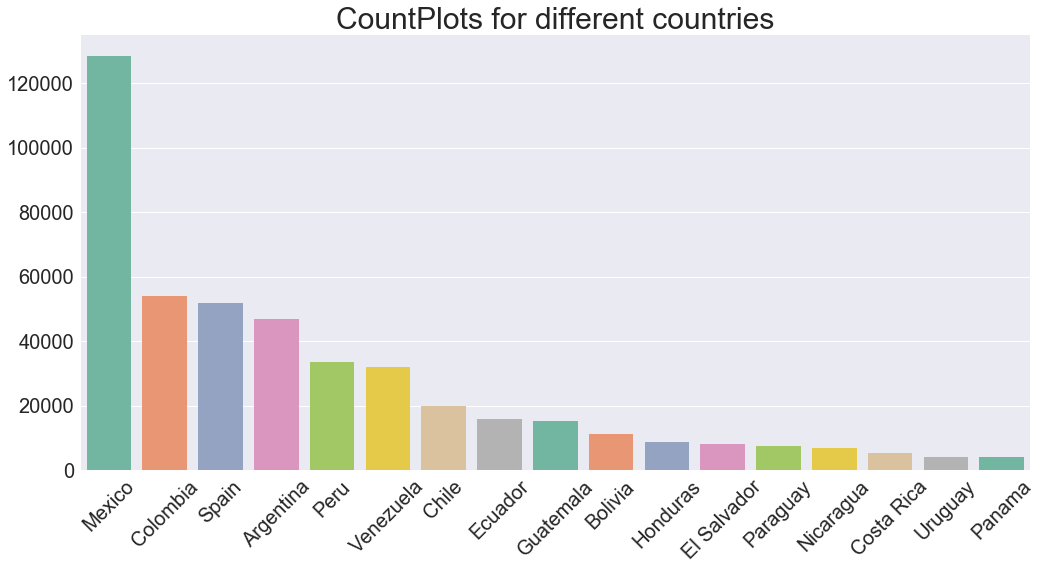

In [416]:
#Countplots for different countries 
sns.set_style('darkgrid')
sns.set(font_scale=2)
d = df['country'].value_counts()
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=d.index,y=d.values,palette='Set2')
ax.set_xticklabels(d.index,rotation=45)
ax.set_title("CountPlots for different countries",fontsize=30)
plt.show()

Mexico, Colombia and Spain are the top three countries that land on our site.

In [417]:
n = np.unique(df['country']).shape[0]
df_new = pd.DataFrame(np.zeros([n*2,3]),columns = ["country","count","conversion"])
group = df.groupby('conversion')['country'].value_counts(normalize=True)
df_new['country'] = pd.Series(list(group.index.get_level_values(1)))
df_new['count'] = pd.Series(list(group.values))
df_new['conversion'] = pd.Series(list(group.index.get_level_values(0)))

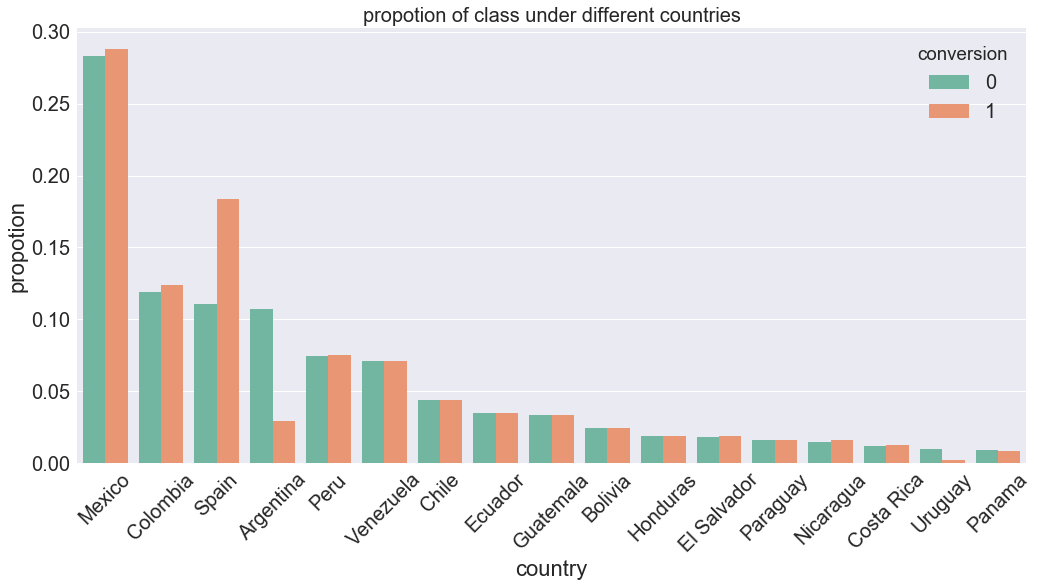

In [418]:
plt.figure(figsize=(17,8))
m = sns.barplot(x='country', y='count', hue='conversion', data=df_new,palette='Set2')
m.set_title("propotion of class under different countries",fontsize=20)
m.set_xticklabels(df_new['country'],rotation=45)
plt.ylabel('propotion')
plt.show()

Mexico are the major users in both converted class and non-converted class and there is no big difference for the propotion in two classes; There are more users from Argentina who don't convert than who converted,  we may focus on adding the translation page for Argentina users. 

#### How is the age of users distributed?

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


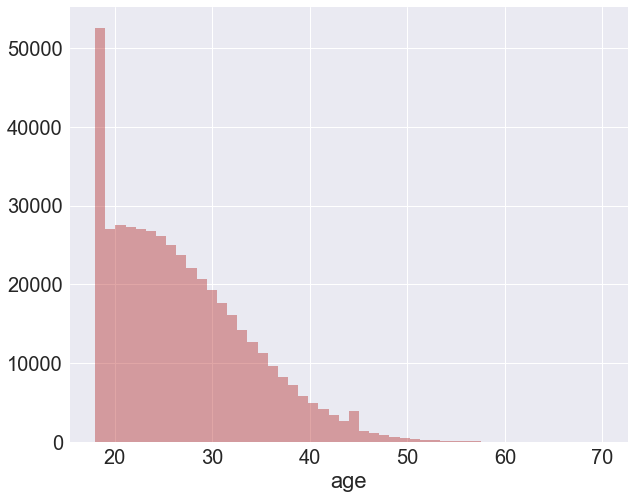

In [419]:
plt.figure(figsize=(10,8))
sns.distplot(df['age'],kde=False,color='firebrick')
plt.show()

/Users/fangqiouyang/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


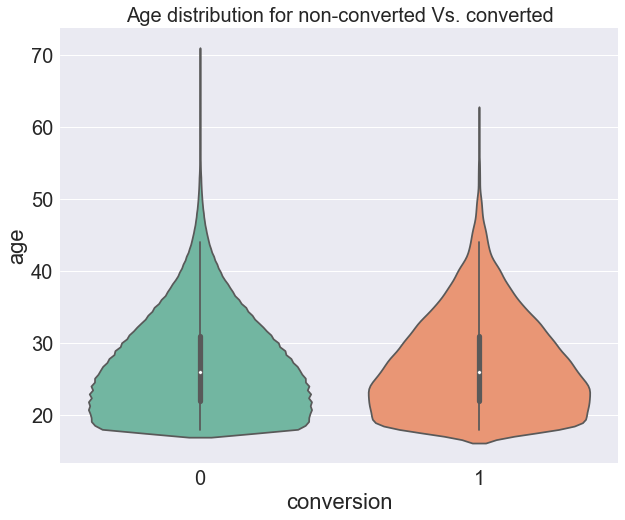

In [420]:
fig = plt.figure(figsize=(10,8))
m = sns.violinplot(
    x= 'conversion',
    y='age',
    data= df,
    palette='Set2'
)
m.set_title("Age distribution for non-converted Vs. converted",fontsize = 20)
plt.show()

More than half of our users are under age 30. The most of our users are around age 11-16; There is no huge age difference for the users in two classes. 

#### How are the sources distributed?

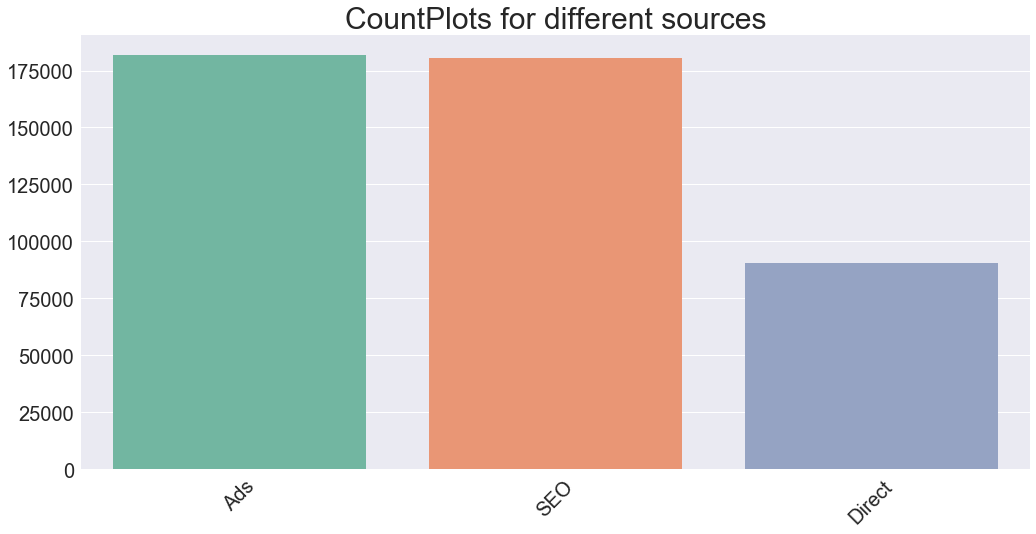

In [421]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
d = df['source'].value_counts()
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=d.index,y=d.values,palette='Set2')
ax.set_xticklabels(d.index,rotation=45)
ax.set_title("CountPlots for different sources",fontsize=30)
plt.show()

Most of our users find our website though Ads and SEO. 

#### How are the devices distributed? 

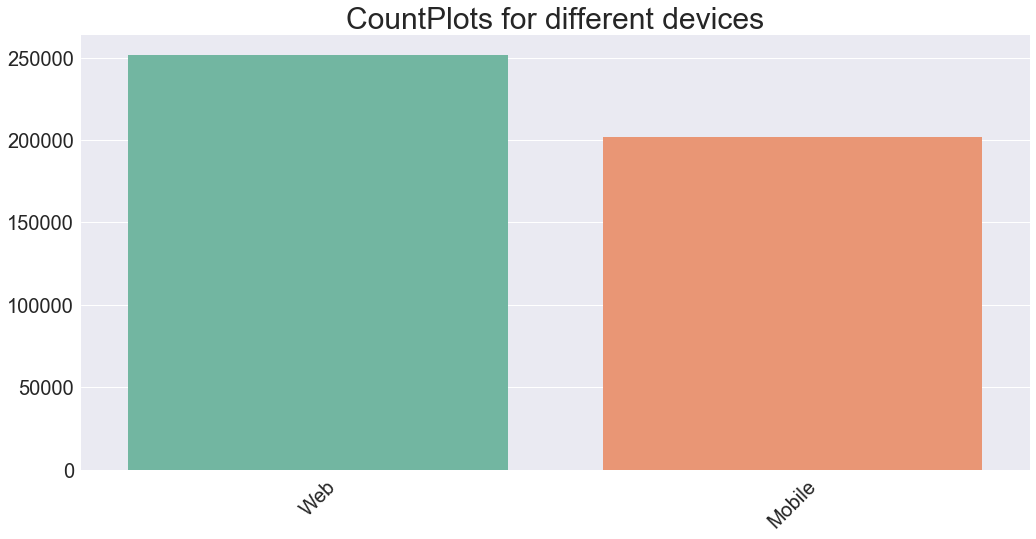

In [422]:
sns.set_style('darkgrid')
sns.set(font_scale=2)
d = df['device'].value_counts()
fig = plt.figure(figsize=(17,8))
ax = fig.add_subplot(111)
sns.barplot(x=d.index,y=d.values,palette='Set2')
ax.set_xticklabels(d.index,rotation=45)
ax.set_title("CountPlots for different devices",fontsize=30)
plt.show()

Most of our users are using our website though web.

#### How are the browser language distributed?

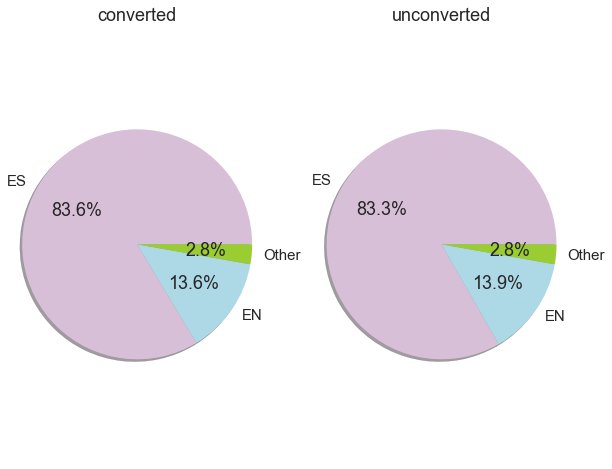

In [423]:
sns.set_style('darkgrid')
sns.set(font_scale=1.5)
figure = plt.figure(figsize=(17,8))
data_con = df.loc[df['conversion']==1,:]
data_non = df.loc[df['conversion']==0,:]
sizes1 = pd.Series(data_con['browser_language'].value_counts().values)
label1 = pd.Series(data_con['browser_language'].value_counts().index)

sizes2 = pd.Series(data_non['browser_language'].value_counts().values)
label2 = pd.Series(data_non['browser_language'].value_counts().index)

#fig, (ax1,ax2) = plt.subplots(ncols=2)
cor = ["thistle","lightblue","yellowgreen"]
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.pie(sizes1, labels=label1, autopct='%1.1f%%', shadow=True,colors=cor)
ax1.axis('equal')
ax1.set_title("converted")
ax2.pie(sizes2, labels=label2, autopct='%1.1f%%', shadow=True,colors=cor)
ax2.axis('equal')
ax2.set_title("unconverted")
plt.show()

The distribution of browser language in two classes are mostly the same.

#### How are the ads-channel distributed 

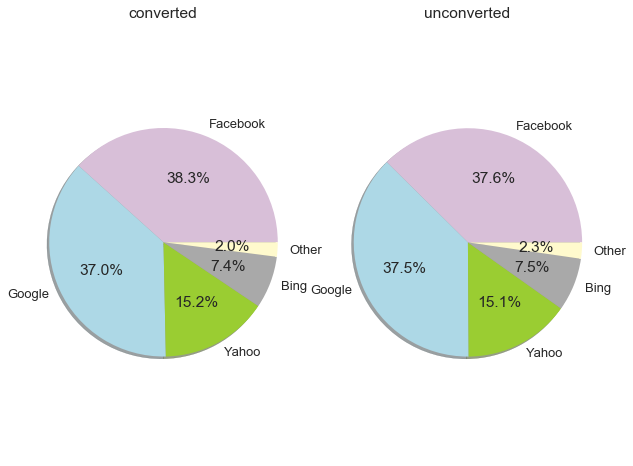

In [424]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
figure = plt.figure(figsize=(10,8))
sizes1 = pd.Series(data_con['ads_channel'].value_counts().values)
label1 = pd.Series(data_con['ads_channel'].value_counts().index)

sizes2 = pd.Series(data_non['ads_channel'].value_counts().values)
label2 = pd.Series(data_non['ads_channel'].value_counts().index)

#fig, (ax1,ax2) = plt.subplots(ncols=2)
cor = ["thistle","lightblue","yellowgreen","darkgrey","lemonchiffon"]
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.pie(sizes1, labels=label1, autopct='%1.1f%%', shadow=True,colors=cor)
ax1.axis('equal')
ax1.set_title("converted")
ax2.pie(sizes2, labels=label2, autopct='%1.1f%%', shadow=True,colors=cor)
ax2.axis('equal')
ax2.set_title("unconverted")
plt.show()

The distribution of the ads channel are mostly the same in two classes.

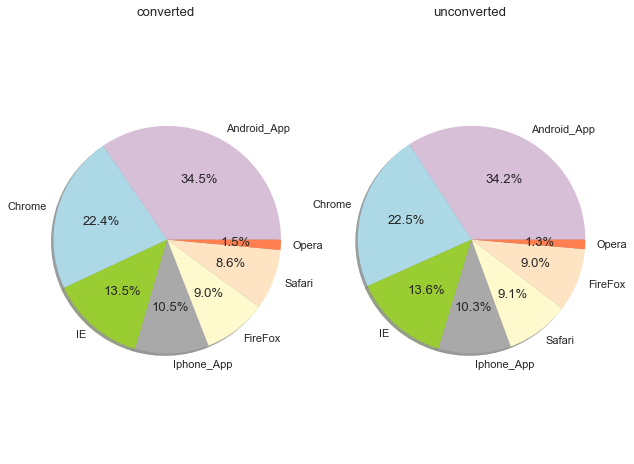

In [425]:
sns.set_style('darkgrid')
sns.set(font_scale=1.1)
figure = plt.figure(figsize=(10,8))
sizes1 = pd.Series(data_con['browser'].value_counts().values)
label1 = pd.Series(data_con['browser'].value_counts().index)

sizes2 = pd.Series(data_non['browser'].value_counts().values)
label2 = pd.Series(data_non['browser'].value_counts().index)

#fig, (ax1,ax2) = plt.subplots(ncols=2)
cor = ["thistle","lightblue","yellowgreen","darkgrey","lemonchiffon","bisque","coral"]
fig = plt.figure(figsize=(10,8))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.pie(sizes1, labels=label1, autopct='%1.1f%%', shadow=True,colors=cor)
ax1.axis('equal')
ax1.set_title("converted")
ax2.pie(sizes2, labels=label2, autopct='%1.1f%%', shadow=True,colors=cor)
ax2.axis('equal')
ax2.set_title("unconverted")
plt.show()

The distribution of browsers are mostly the same in two classes.

### A/B Testing  

In [426]:
df_no_spain = df.loc[df['country']!='Spain',:]
df_no_spain.groupby("test")[["conversion"]].mean()

,conversion
test,
0,0.048292
1,0.043411


In [427]:
stats.ttest_ind(df_no_spain.loc[df_no_spain.test==0,"conversion"],df_no_spain.loc[df_no_spain.test==1,"conversion"]).pvalue/2

7.796646389408428e-14

Since p-value is significant, reject the null hypothesis, which means there is higher conversion rate for the test group than the controlled group.

In [428]:
df0 = df_no_spain.loc[df_no_spain.test==0,:]
df1 = df_no_spain.loc[df_no_spain.test==1,:]

d1 = np.array(df1.groupby('date')['conversion'].aggregate(np.mean))
d0 = np.array(df0.groupby('date')['conversion'].aggregate(np.mean))
print(d1)
print(d0)

[0.04387779 0.04137116 0.04421637 0.0438976  0.04345885]
[0.0512042  0.04624935 0.04847248 0.04925479 0.04708512]


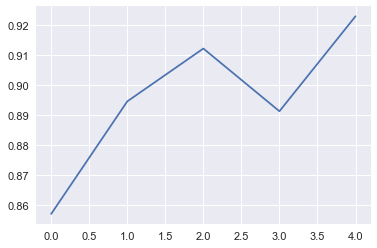

In [429]:
plt.plot(d1/d0)
plt.show()

The test group has consistent lower conversion rate than the controlled group, there has been some bias in the experimental design.  This may caused by the non-random samples, which is to say, the samples in the test group mainly come from the group with lower conversion rate. 

In [430]:
tree = DecisionTreeClassifier(max_depth=2)

In [431]:
col = ["date","source","device","browser_language","browser","sex","age","country"]
for i in col:
    if(df[i].dtype == "object"):
        df[i] = LabelEncoder().fit_transform(df[i])
tree.fit(pd.DataFrame(df[col]),pd.Series(df["test"]))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [432]:
tree.tree_.compute_feature_importances()

array([0., 0., 0., 0., 0., 0., 0., 1.])

It seems that the country can be used to split the test and controlled  group. Hence the samples in two groups are not random. we want to perform two sample t-test under the controlled country group.

In [440]:
for c in np.unique(country):
    test = df1.loc[df1.country==c,'conversion']
    control = df0.loc[df0.country==c,'conversion']
    print ('p-value for '+ country +' is '+ str(stats.ttest_ind(control, test)[0]/2))

['p-value for Argentina is 0.4954225555842072'
 'p-value for Bolivia is 0.4954225555842072'
 'p-value for Chile is 0.4954225555842072'
 'p-value for Colombia is 0.4954225555842072'
 'p-value for Costa Rica is 0.4954225555842072'
 'p-value for Ecuador is 0.4954225555842072'
 'p-value for El Salvador is 0.4954225555842072'
 'p-value for Guatemala is 0.4954225555842072'
 'p-value for Honduras is 0.4954225555842072'
 'p-value for Mexico is 0.4954225555842072'
 'p-value for Nicaragua is 0.4954225555842072'
 'p-value for Panama is 0.4954225555842072'
 'p-value for Paraguay is 0.4954225555842072'
 'p-value for Peru is 0.4954225555842072'
 'p-value for Spain is 0.4954225555842072'
 'p-value for Uruguay is 0.4954225555842072'
 'p-value for Venezuela is 0.4954225555842072']
['p-value for Argentina is 0.17998465162934443'
 'p-value for Bolivia is 0.17998465162934443'
 'p-value for Chile is 0.17998465162934443'
 'p-value for Colombia is 0.17998465162934443'
 'p-value for Costa Rica is 0.1799846516

['p-value for Argentina is 0.281279226072871'
 'p-value for Bolivia is 0.281279226072871'
 'p-value for Chile is 0.281279226072871'
 'p-value for Colombia is 0.281279226072871'
 'p-value for Costa Rica is 0.281279226072871'
 'p-value for Ecuador is 0.281279226072871'
 'p-value for El Salvador is 0.281279226072871'
 'p-value for Guatemala is 0.281279226072871'
 'p-value for Honduras is 0.281279226072871'
 'p-value for Mexico is 0.281279226072871'
 'p-value for Nicaragua is 0.281279226072871'
 'p-value for Panama is 0.281279226072871'
 'p-value for Paraguay is 0.281279226072871'
 'p-value for Peru is 0.281279226072871'
 'p-value for Spain is 0.281279226072871'
 'p-value for Uruguay is 0.281279226072871'
 'p-value for Venezuela is 0.281279226072871']


There is no significant p-value for test and control after we controlled the country group, which means the original abnormal result is caused by the non-random samples in two classes, as each class choose their examples from different country group. 


In [445]:
country.unique

AttributeError: 'numpy.ndarray' object has no attribute 'unique'